<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

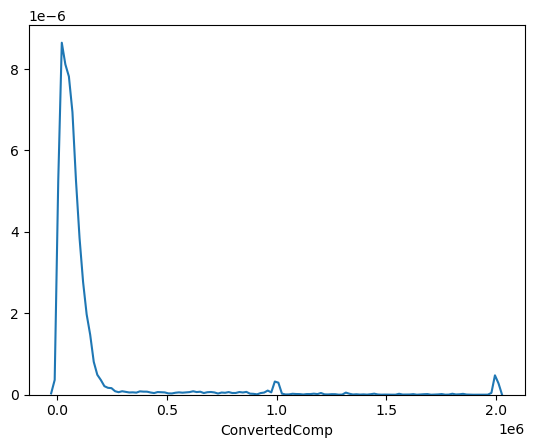

In [16]:
sns.distplot(df['ConvertedComp'], 'ConvertedComp', hist = False, kde = True)

plt.show()

Plot the histogram for the column `ConvertedComp`.


<AxesSubplot:ylabel='Frequency'>

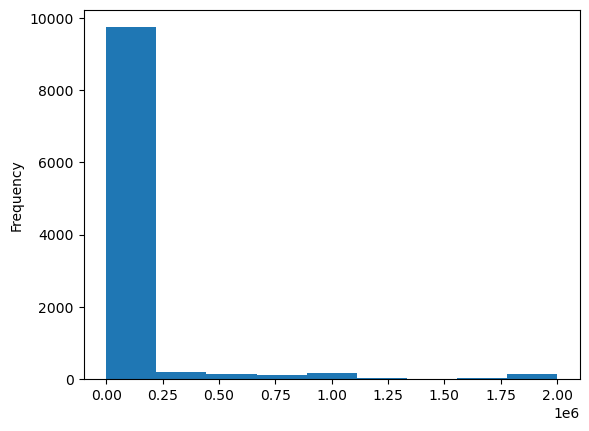

In [17]:
df['ConvertedComp'].plot.hist (bins = 9, alpha = 1)

What is the median of the column `ConvertedComp`?


In [50]:
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [19]:
print('\nAll genders are listed as below')
print(df['Gender'].value_counts())
print('\nTotal of responders identified themselves only as a Man is: ',df['Gender'].eq('Man').sum())


All genders are listed as below
Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Total of responders identified themselves only as a Man is:  10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [20]:
print('Full list: \n', df[df['Gender'].eq('Woman')].median())

print('\nThe median ConvertedComp of responders identified themselves only as a Woman is: ', df[df['Gender'].eq('Woman')]['ConvertedComp'].median())

Full list: 
 Respondent       11973.0
CompTotal        65000.0
ConvertedComp    57708.0
WorkWeekHrs         40.0
CodeRevHrs           4.0
Age                 28.0
dtype: float64

The median ConvertedComp of responders identified themselves only as a Woman is:  57708.0


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Give the five number summary for the column `Age`?


In [21]:
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


<AxesSubplot:ylabel='Frequency'>

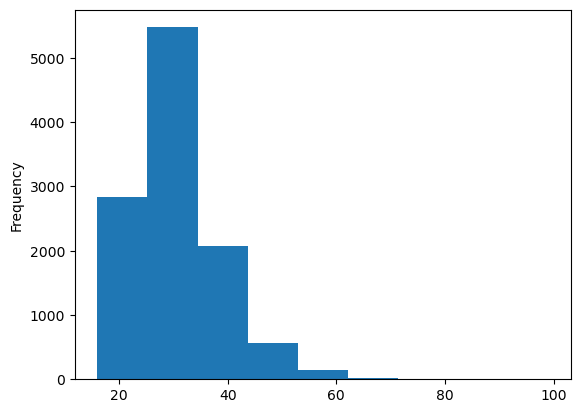

In [22]:
df['Age'].plot.hist(bins = 9, alpha = 1)

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:xlabel='ConvertedComp'>

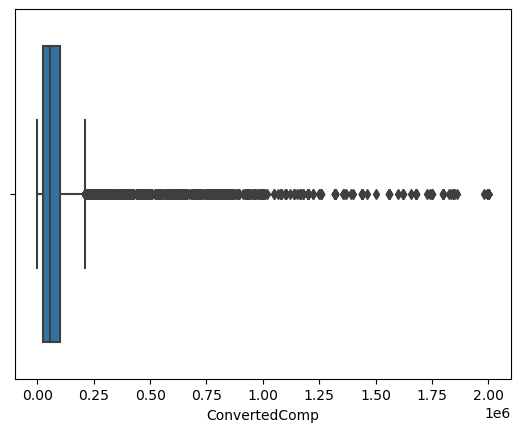

In [23]:
sns.boxplot(x=df["ConvertedComp"])

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [24]:
print ('For reference: ')
print (df['ConvertedComp'].describe())

Q1 = df['ConvertedComp'].quantile(0.25)
Q3= df['ConvertedComp'].quantile(0.75)
IQR = Q3-Q1
print('\nThe IQR for the column ConvertedComp is:', IQR)

For reference: 
count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

The IQR for the column ConvertedComp is: 73132.0


Find out the upper and lower bounds.


In [25]:
minval = df['ConvertedComp'].min()
maxval = df['ConvertedComp'].max()

print('The upper and lower bounds are', maxval, 'and', minval)

The upper and lower bounds are 2000000.0 and 0.0


Identify how many outliers are there in the `ConvertedComp` column.


In [36]:
above = Q3 + 1.5 * IQR
below = Q1-1.5*IQR
outliers = df[((df['ConvertedComp']<below) | (df['ConvertedComp']>above))]
len(outliers)

879

In [43]:
print(df.shape) #check size

(11398, 85)


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [44]:
df1 = df['ConvertedComp'].drop(outliers.index)
print(df1.shape) #confirm outliers successfully removed

(10519,)


In [51]:
df1.median() #median after removing outliers

52704.0

In [53]:
df1.mean() #mean after removing outliers

59883.20838915799

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [48]:
df.corr()['Age']

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
